## 0.크롤링(Crawling)

### 0-1.웹사이트 동작 구조
- 사용자(User)는 네이버에 접속하기위해서 웹 브라우저(IE, Edge, 크롬 등)의 주소 창
에 URL 주소(www.naver.com) 입력
- 웹 브라우저(Client)는 사용자가 입력한 URL 주소에 해당하는 서버를 찾아가 정보 요청(Request)
- 웹 서버는 웹 브라우저가 요청사항에 대해 응답(Response)
- 웹 브라우저는 서버에서 받은 정보를 해석하여 사용자에게 보여줌

  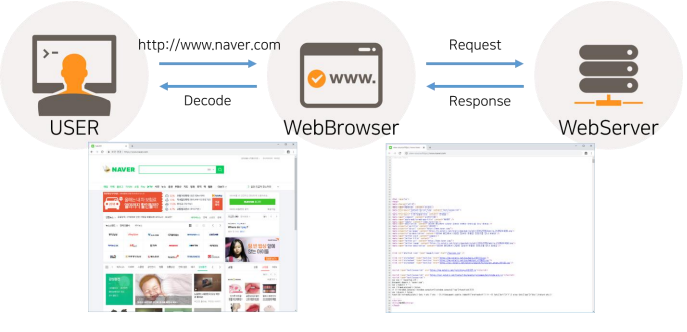

**HTTP Method**
- Client(웹 브라우저)는 GET 또는 POST를 이용하여 Server(웹서버)에 정보 요청
(Request)
- Server에요청 시 특정한 값을 포함하여 요청하는 경우가 있음
- 예) 네이버에 로그인하는 경우 아이디와 비밀번호를 포함하여 서버에 전송

**GET** - URL에 값을 추가하여 전달

   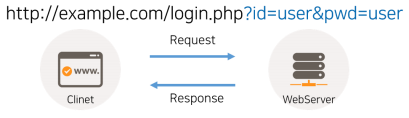

**POST** - HTTP 프로토콜 Header에값을 추가하여 전달

  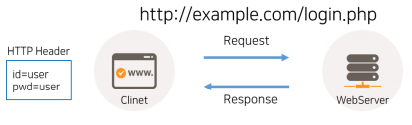

**HTML(Hypertext Markup Language)**
- 웹 페이지의 모습을 기술하기 위한 규약
- 프로그래밍 언어가 아니라 마크 업 언어
- HTML을 기술하기 위하여 사용하는 명령어의 집합을 태그(Tag)라고 함


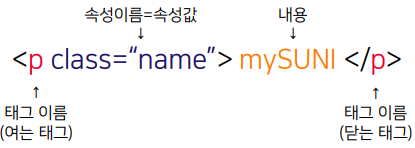


### 0-2.크롤링(Crawling)
- 크롤링은 데이터를 수집하고 분류하는것을 의미
- 주로 인터넷 상의 웹페이지(html, 문서 등)를 수집해서 분류하고 저장
- 파싱은 웹페이지의 데이터를 문법에 맞게 분석해 내는 것
    - 어떤 웹페이지의 데이터를 사용자가 원하는 형식으로 추출해 정보를 만들어 내는 것
    - 데이터를 원하는 형태로 가공하는 작업이 주요 목적
- 크롤링을 하는 방법에는 크게 직접 코드를 작성하는 경우와 데이터를 수집하고자하는
사이트 혹은 회사에서 제공하는 API(Application Programming Interface)를 사용
하는 방법이 존재
    - API 사용시 빠른 시간에 정제된 형태의 데이터를 수집할 수 있고, 데이터를 소유하고 있는 기업에서 제공하기 때문에 데이터 사용에 따른 법적·윤리적 문제가 거의 없음

In [ ]:
# 일반적인 크롤링 순서
- 검색하기 쉬운 구조의 문서를 검색
1. html 문서를 다운로드 (url지정)
   1-1) html 문서를 로컬에 다운로드 받고, open을 이용해 열어 read해서 사용 
        # [4] 참조, urllib.request.urlretrieve(url, 'py.txt')
   1-2) html 문서를 메모리에 저장하고, 필요시 decode() 해서 사용
        # [9] 참조, urllib.request.urlopen(url_params).read()
   => str 
2. 파싱(BeautifulSoup) => soup
3. 파싱된 문서(soup)에서 원하는 데이터의 위치를 검색 (시간이 걸릴 수 있음)
   => find, select, ...
4. 자료를 구조화 => dict, list, ... => numpy => pandas
5. 파일 저장

## 1.Request

### 1) 텍스트 파일 다운로드
- urllib.request : HTTP또는 FTP를 이용하여 데이터를 다운로드 할 수 있는 기능을 모아놓은 패키지
- urlretrieve 함수를 이용하여 파일을 다운로드함
   - urllib.request.urlretrieve(url, 파일이름) => (파일이름, header) 반환
   - 파일이름을 사용하여 open 하면 내용을 읽을 수 있음
- text인 경우 x.read(), x.readlines()를 사용함
   - x.read() : str type
   - x.readlines() : list type (item 은 str type)

In [ ]:
# https://docs.python.org/3/library/urllib.request.html
# https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve

In [ ]:
import urllib.request
local_filename, headers = urllib.request.urlretrieve('http://python.org/', 'python.txt')
html = open(local_filename)
html.close()
print(local_filename, headers, sep='\n\n')

python.txt

Connection: close
Content-Length: 49859
Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: DENY
Via: 1.1 vegur, 1.1 varnish, 1.1 varnish
Accept-Ranges: bytes
Date: Thu, 01 Sep 2022 01:34:16 GMT
Age: 1913
X-Served-By: cache-iad-kiad7000112-IAD, cache-icn1450072-ICN
X-Cache: HIT, HIT
X-Cache-Hits: 445, 9
X-Timer: S1661996057.566947,VS0,VE0
Vary: Cookie
Strict-Transport-Security: max-age=63072000; includeSubDomains




In [ ]:
# [1] url에 주어진 문서를 'kma.txt'로 다운로드 받습니다.
# urllib.request.urlretrieve() 함수를 사용하며, 
# 반환 받은 파일명과 header(=HTTPMessage)를 각각 local_filename, header에 저장한다
# local_filename, header의 type, header를 각각 출력해 내용을 확인한다

import urllib.request
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=108'
A = urllib.request.urlretrieve(url, 'kma.txt')
print(A)
local_filename, header = A
print(local_filename, type(header), header, sep='\n\n')

('kma.txt', <http.client.HTTPMessage object at 0x00000206DCE3BF70>)
kma.txt

<class 'http.client.HTTPMessage'>

Server: openresty/1.15.8.2
Date: Thu, 01 Sep 2022 02:09:05 GMT
Content-Type: text/xml;charset=utf-8
Transfer-Encoding: chunked
Connection: close
Strict-Transport-Security: max-age=15724800; includeSubDomains
Set-Cookie: JSESSIONID=3B8EC12F83318D93DB6EC119FDDF3C08; Path=/; HttpOnly




In [ ]:
# t (text) : 메모장으로 열기가능, .txt, .csv, [.html, .htm]-> browser로 열기
# b (binary) : 해당 파일을 읽고/쓰기 위한 별도 프로그램이 필요
  # 이미지(.jpg, .png, ...), mp3, .xlsx

In [ ]:
# [2] 위의 local_filename에 저장된 이름의 파일을 열어 내용을 읽고 출력해 봅니다.
# open(filename, 'rt', encoding='utf-8') 함수 사용, file.read() 함수 사용
# file.close()로 파일 열기를 종료함

html = open(local_filename, 'rt', encoding='utf-8') 
content1 = html.read()
html.close()
print(type(html), html, type(content1), content1[:300], sep='\n\n')

<class '_io.TextIOWrapper'>

<_io.TextIOWrapper name='kma.txt' mode='rt' encoding='utf-8'>

<class 'str'>

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2022년 09월 01일 (목)요일 06:00</pubDate>
 


In [ ]:
# [3] 위의 local_filename에 저장된 이름의 파일을 열어 내용을 읽고 출력해 봅니다.
# with statement + open() 함수를 사용하는 코드로 작성해 보자
# file.readlines() 사용
#html = open(local_filename, 'rt', encoding='utf-8')
with open(local_filename, 'rt', encoding='utf-8')  as html:
    content2 = html.readlines()

print(type(content2), content2[:3], sep='\n\n')

<class 'list'>

['<?xml version="1.0" encoding="utf-8" ?>\n', '<rss version="2.0">\n', '<channel>\n']


In [11]:
# [4] 다음 url에 대해  위와 동일한 작업을 진행해 보자

import urllib.request
url = 'http://python.org/'
filename, header = urllib.request.urlretrieve(url, 'py.txt')
print(header)
with open(filename, 'rt' , encoding='UTF8') as html:
    content3 = html.read()
    print(dir(html))

print(type(content3), content3[:300], sep='\n\n')

Connection: close
Content-Length: 49864
Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: DENY
Via: 1.1 vegur, 1.1 varnish, 1.1 varnish
Accept-Ranges: bytes
Date: Thu, 01 Sep 2022 08:07:31 GMT
Age: 231
X-Served-By: cache-iad-kiad7000112-IAD, cache-icn1450045-ICN
X-Cache: HIT, HIT
X-Cache-Hits: 343, 1
X-Timer: S1662019652.601355,VS0,VE1
Vary: Cookie
Strict-Transport-Security: max-age=63072000; includeSubDomains


['_CHUNK_SIZE', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_finalizing', 'buffer', 'close', 'closed', 'detach', 'encoding', 'errors', 'fileno', 'flush', 'isatty'

### 2) 원하는 요소의 url 찾기
- 개발자 도구 (F12)
- element 선택하는 아이콘 (개발자 창의 좌측 상단) 클릭
- 웹 페이지 화면에서 element 클릭



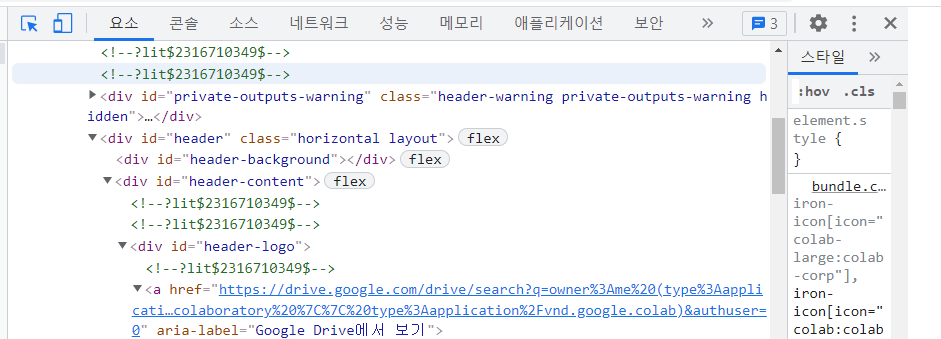

In [ ]:
# [5] 원하는 image의 url을 찾아보자!
cat_img = 'https://postfiles.pstatic.net/MjAyMjA4MTlfMTIw/MDAxNjYwOTA4NDIxMjA0.BsbdqENtFrp4BNM4BzRJgsBPoPvggL0dunRQuUKigusg.qxzfimbCqfTzd-EWTjfOo4LbpY_8IKbR4ujuTZ70iY4g.JPEG.j7qt4/%EC%95%88%EC%82%B0%EA%B3%A0%EC%96%91%EC%9D%B4%EB%B6%84%EC%96%91_(5).jpg?type=w773'

### 3) binary 데이터 다운로드
- 1) urllib.request.urlopen(url).read() 을 사용하여 데이터를 메모리에 저장
- 2) open(저장파일이름, mode='wb')로 토큰을 얻음
- 3) 토큰.write(데이터) 로 데이터를 파일에 저장
- 4) 토큰.close()    # with 를 사용하는 경우 불필요함

In [ ]:
# [6] 위에서 찾은 image의 url 정보를 사용하여 local에 다운로드를 받아보자
# 저장 파일이름은 임의로 지정하여 보자. (확장자는 맞출 것)
import urllib.request

url = 'https://ssl.pstatic.net/tveta/libs/1299/1299153/c8b7fa82f1c7e189d180_20200811144130654.jpg'
savename = 'test.jpg'
data =  urllib.request.urlopen(url).read()
with open(savename, mode='wb') as my_img:
    my_img.write(data)

test.png 저장됨


In [ ]:
# 여러분들의 이미지를 다운로드 받아보세요!
import urllib.request
url = 'https://allways.smotor.com/wp-content/uploads/2022/08/5-4-1024x576.jpg'
savename = 'car.jpg'
data = urllib.request.urlopen(url).read()
with open(savename, mode='wb') as car_image:
    car_image.write(data)

### 4) 웹 데이터 추출
- urllib.parse.urlencode 함수를 사용, url에 추가할 매개변수 문자열 생성
- ```https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode```
- quote_via=urllib.parse.quote 를 사용하면, 공백이 %20 으로 삽입되며, 사용하지 않으면 + 로 삽입됨

URL에 매개 변수 추가하는 방법
1. 매개변수 생성 => params 생성
   - values : dict로 작성
   - params = urllib.parse.urlencode(values)   
2. 매개변수(params) 추가 방법
   - url_params = url + '?' + params

In [ ]:
# [7] 아래의 url_params 를 생성해 보자
# https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=103
import urllib.parse

url = 'https://news.naver.com/main/main.nhn'
values = {'mode':'LSD', 'mid':'shm', 'sid1':103}
params = urllib.parse.urlencode(values) # mode=LSD&mid=shm&sid1=103
url_params = url + "?" + params
display(url_params)

'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=103'

In [ ]:
#'mode=LSD', 'mid=shm', 'sid1=103'
values = {'mode':'LSD', 'mid':'shm', 'sid1':103}
A = [f'{key}={value}' for key, value in values.items()]
'&'.join(A)

'mode=LSD&mid=shm&sid1=103'

In [ ]:
def my_urlencode(url, values):
    params = "&".join( f'{key}={value}' for key, value in values.items() )
    return f'{url}?{params}'

url = 'https://news.naver.com/main/main.nhn'
values = {'mode':'LSD', 'mid':'shm', 'sid1':103}
my_url = my_urlencode(url, values)   
print(my_url)
# 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=103'

https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=103


In [ ]:
A = [5, 8, 4, 9, 1, 2, 7]
B = zip(A, range(len(A)))
#  9, 3
max(B)

(9, 3)

In [ ]:
A = [5, 8, 4, 9, 1, 2, 7]
maxnum = 0
for ind, number in enumerate(A):
    if number > maxnum:
        maxnum = number
        maxind = ind
print(maxnum, maxind)

In [ ]:
pip install chardet

In [ ]:
# [8] 위의 url_params 및 urllib.request.urlopen() 함수를 사용하여 내용을 읽어 오기 합니다.
import urllib.request
import urllib.parse
import chardet

data = urllib.request.urlopen(url_params).read()   # 통신용 (bytes 타입)
enc = chardet.detect(data)['encoding']
text = data.decode(enc)
text[1000:1200]

'itle"       content="생활/문화 : 네이버 뉴스">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=103">\r\n'

### 5) 종목, 페이지 번호를 지정
- url : 'https://finance.naver.com/sise/sise_index_day.nhn'
- 위의 url에서 종목, 페이지번호 지정 : 'code', 'page'
    - 'code' : 'KOSPI', 'KOSDAQ', ..
    - 'page' : 1, 2, ...

In [ ]:
# [9] 종목을 지정하여 일별시세를 저장해 보자
import urllib.request
import urllib.parse
import chardet

#https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=1

url = 'https://finance.naver.com/sise/sise_index_day.nhn'
values = {'code':'KOSPI', 'page':1 }   # 이곳의 번호를 수정하면서 실행 해 볼 것
params = urllib.parse.urlencode(values) # code=KOSPI&page=1
url_params = url + "?" + params
print(url_params)

data = urllib.request.urlopen(url_params).read()   # 통신용 (bytes 타입)
enc = chardet.detect(data)['encoding']
html = data.decode(enc)
print(html[:200])

https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=1
<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 금융</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static


In [ ]:
# [9-1] 9번을 함수화
def get_html(url, values):
    import urllib.request
    import urllib.parse
    import chardet

    params = urllib.parse.urlencode(values) # code=KOSPI&page=1
    url_params = url + "?" + params
    data = urllib.request.urlopen(url_params).read()   # 통신용 (bytes 타입)
    enc = chardet.detect(data)['encoding']
    return data.decode(enc)

url = 'https://finance.naver.com/sise/sise_index_day.nhn'
values = {'code':'KOSPI', 'page':1 }   # 이곳의 번호를 수정하면서 실행 해 볼 것
html = get_html(url, values)
html[:200]

'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 금융</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static'

In [ ]:
# [과제] 'code':'KOSPI', 'page': 1 ~ 5
htmls = [page1_html, page2_html, ... page5_html]



## 2.BeautifulSoup

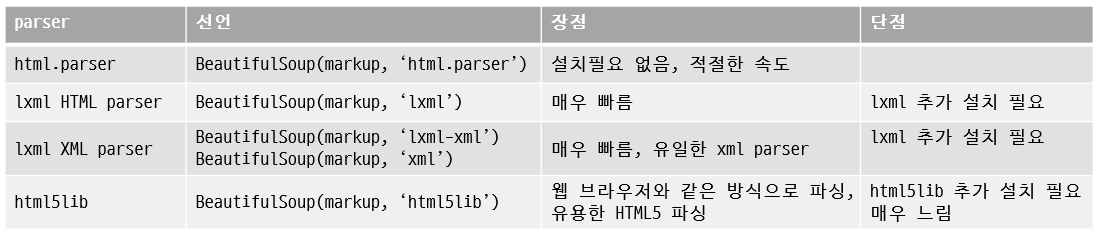

### 1) 태그명을 속성명으로 직접 사용

In [ ]:
pip install bs4

In [ ]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
# [1] 기본 html 문서 작성 및 BeautifulSoup 사용하여 html 문서 파싱
from bs4 import BeautifulSoup

html = """<html>
<body>
   <h1>크롤링</h1>
   <p>웹 페이지 분석</p>
   <p>원하는 내용 추출</p>
</body>
</html>"""

soup = BeautifulSoup(html, 'html.parser')
print(type(soup), soup, sep='\n\n')

<class 'bs4.BeautifulSoup'>

<html>
<body>
<h1>크롤링</h1>
<p>웹 페이지 분석</p>
<p>원하는 내용 추출</p>
</body>
</html>


In [ ]:
soup.html.body.h1

<h1>크롤링</h1>

In [ ]:
# [2] BeautifulSoup의 파싱 결과에서 특정 객체 접근

# 태그명, 속성명으로 직접 접근
h1 = soup.html.body.h1 # 1개
p1 = soup.html.body.p # 2개 중 첫 번째꺼
p2 = p1.next_sibling.next_sibling  # 다음 태그
what = h1.next_sibling.next_sibling.next_sibling.next_sibling

print('h1', h1.string)
print('p1', p1.string)
print('p2', p2.string)
print('what', what.string)

h1 크롤링
p1 웹 페이지 분석
p2 원하는 내용 추출
what 원하는 내용 추출


### 2) find 함수의 사용
- soup.find('태그명')
- soup.find(id='id명')
- soup.find(text='텍스트내용')
- soup.find('태그명', attrs={'id':'...', 'class':'...'})

In [ ]:
help(BeautifulSoup.find)

In [42]:
from bs4 import BeautifulSoup

html2 = """<html>
<body>
   <h1 id='title'>크롤링</h1>
   <p id='p1'>웹 페이지 분석</p>
   <p id='p2'>원하는 내용 추출</p>
</body>
</html>"""

soup2 = BeautifulSoup(html2, 'html.parser')

In [43]:
# [3] 태그로 직접 접근 - h1
h1 = soup2.html.body.h1#
print('h1', h1.string)

# [4] find 함수 - 태그 사용하여 객체 가져오기
# h1
h1 = soup2.find('h1')
print('h1', h1.string)

h1 크롤링
h1 크롤링


In [44]:
# [5] find 함수 - id를 사용하여 객체 가져오기
# title, p1, p2 
title = soup2.find(id='title')
p1 = soup2.find(id='p1')
p2 = soup2.find(id='p2')
print('title', title.string)
print('p1', p1.string)
print('p2', p2.string)

title 크롤링
p1 웹 페이지 분석
p2 원하는 내용 추출


In [ ]:
# p2.string
# Convenience property to get the single string within this tag.

# :Return: If this tag has a single string child, return value
#  is that string. If this tag has no children, or more than one
# child, return value is None. If this tag has one child tag,
# return value is the 'string' attribute of the child tag,
# recursively.

In [45]:
# [6] find 함수 - text를 사용하여 객체 가져오기
title = soup2.find(text='크롤링')

# [6-2] find함수 - attrs을 사용하여 객체 가져오기
p2 = soup2.find('p', attrs={'id':'p2'})
print('title', title.string)
print('p2', p2.string)

title 크롤링
p2 원하는 내용 추출


### 3) BeautifulSoup Example

In [49]:
# [7] 무엇이 출력될까?
import urllib.request

url = 'https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI'
data = urllib.request.urlopen(url).read()
text = data.decode('cp949')

soup3 = BeautifulSoup(text, 'html.parser')
#print(soup3)
title = soup3.html.head.title
table= soup3.find("table")
# body > div > table.type_1 > tbody > tr:nth-child(1) > th:nth-child(1)
#print(table.tr.th)
print('title : ', title.string)
print('content : ', table.tr.th.string)

title :  네이버 금융
content :  날짜


### 4) 여러 개의 요소 출력하기

In [50]:
# 실습을 위한 html3, soup3 생성 
from bs4 import BeautifulSoup

html3 = """<html>
<body>
    <ul>
        <li><a href='http://www.naver.com'>naver</a></li>
        <li><a href='http://www.daum.net'>daum</a></li>
    </ul>   
</body>
</html>"""

soup3 = BeautifulSoup(html3, 'html.parser')

In [51]:
#[8] find_all을 사용해 'a' 태그 모두 찾기
link = soup3.find_all('a')
print(link)
for a in link:
    href = a.attrs['href']
    text = a.string
    print(text, '-->', href)

[<a href="http://www.naver.com">naver</a>, <a href="http://www.daum.net">daum</a>]
naver --> http://www.naver.com
daum --> http://www.daum.net


In [56]:
# 실습을 위한 html4, soup4 생성 
from bs4 import BeautifulSoup

html4 = """<html>
<body>
   <h1 id='title'>크롤링</h1>
   <p id='body'>웹 페이지 분석</p>
   <p class='A B C'>원하는 내용 추출</p>
</body>
</html>"""
soup4 = BeautifulSoup(html4, 'html.parser')

In [ ]:
# tag.attrs.get('id', False)


In [61]:
# [9] soup4 에서 find_all을 사용해 'p' 태그 모두 찾은 뒤, attrs에서 'id'인 것 찾기

# link => list type
# x.attrs => dict type
link = soup4.find_all('p')
for a in link:
    if a.attrs.get('id', False):
        id = a.attrs['id']
        b = a.string
        break
        
print(f'{b} --> {id}')
# <p id='body'>웹 페이지 분석</p>

웹 페이지 분석 --> body


### 5) CSS 선택자
- select_one(<선택자>) : CSS 선택자로 요소 하나를 추출
- select(<선택자>) : CSS 선택자로 요소 여러 개를 리스트로 추출
- 선택자 기호
  - '#' : id  (유일한 별명)
  - '.' : class (유일하지 않을 수 있음)
  - '>' : 하위 태그

In [62]:
# 데이터 생성
from bs4 import BeautifulSoup

html="""<html><body>
<div id="loc">
    <h1>지역</h1>
    <ul class="items">
        <li>서울></li>
        <li>부산></li>
        <li>대구></li>
    </ul>
</div>
</body></html>"""
soup = BeautifulSoup(html, 'html.parser')

In [63]:
# [10] select_one() 사용, <h1>지역</h1> 가져오기
# id접근은 #, class 접근은 .  하위는 >
h1 = soup.select_one('div#loc > h1')
print(h1, h1.string, sep='\n\n')

<h1>지역</h1>

지역


In [65]:
# [11] select_one() 사용, <li>서울></li> 가져오기
# id접근은 #, class 접근은 .  하위는 >
#seoul = soup.select_one('li')
seoul = soup.select_one('div#loc > ul.items > li')
print(seoul, seoul.string, sep='\n\n')

<li>서울&gt;</li>

서울>


In [67]:
# [12] select() 사용, 모든 li 가져오기
li_list = soup.select('div#loc > ul.items > li')
li_list  

[<li>서울&gt;</li>, <li>부산&gt;</li>, <li>대구&gt;</li>]

In [68]:
# [13] li_list에서 텍스트 정보만 꺼내기

li_text = [li.string[:-1] for li in li_list]
# li_text = ['서울', '부산', '대구']
print(li_text)

['서울', '부산', '대구']


In [69]:
li_list2 = []
for a in li_list:
    li_list2.append(a.string[:-1])   
print(li_list2)

['서울', '부산', '대구']


In [71]:
li_list2 = [0] * len(li_list)   # 속도에 도움
for i, a in enumerate(li_list):
    li_list2[i] = a.string[:-1]  
print(li_list2)

['서울', '부산', '대구']


### 6) 네이버금융에서 환율 정보(원/달러) 추출하기

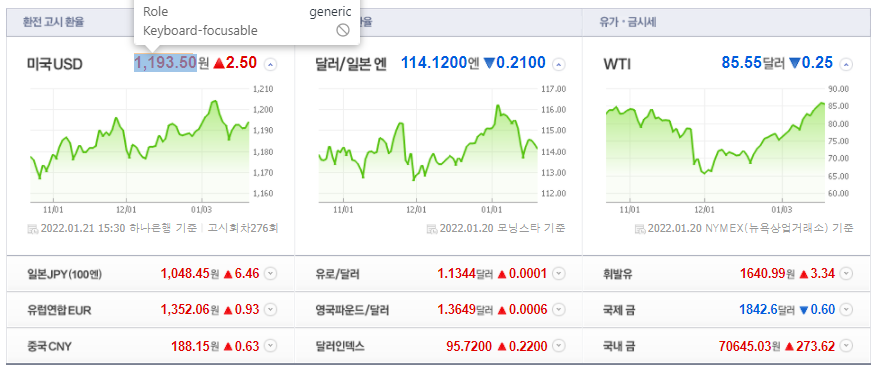

In [13]:
import urllib.request
from bs4 import BeautifulSoup

#데이터 받아오기
url = 'http://finance.naver.com/marketindex/'
res = urllib.request.urlopen(url).read()
res = res.decode('cp949')

#HTML Parsing을 위한 변환
soup = BeautifulSoup(res, 'html.parser')
#res  # 개발자 모드에서 확인

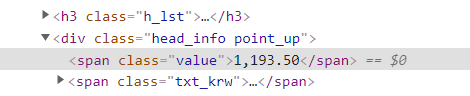

In [40]:
# [1] CSS 선택자를 이용한 환율 정보(원/달러) 가져오기
data1 = soup.select_one('span.value') # 이정윤
data2 = soup.select_one('div > span.value')  # 이수종
data3 = soup.select_one('div.head_info > span.value')  # 유다송
data4 = soup.select_one('#exchangeList > li.on > a.head.usd > div.head_info > span.value') # 윤태호
#print([x.string for x in [data1, data2, data3, data4]], sep='\n')

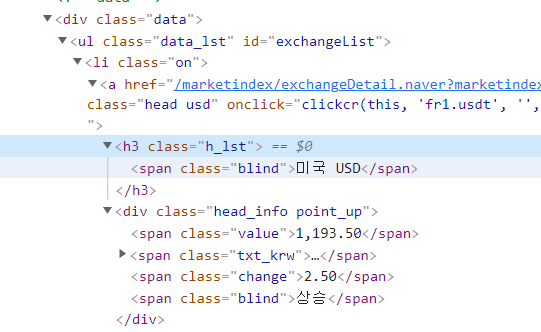

In [29]:
# [2] CSS 선택자를 이용한 환전고시환율, 국제 시장 환률, 유가/금시세 가져오기 (제목)
datas1 = soup.select('ul.data_lst > li > a > h3.h_lst > span')
datas2 = soup.select('div.title > h2')  # 다른 것을 가져왔음
datas3 = soup.select('h3.h_lst')
datas4 = soup.select('h3 > span')  # 초과
h_lst = [li.string for li in datas2]
h_lst

['환전 고시 환율', '국제 시장 환율', '유가·금시세']

In [34]:
# [3] CSS 선택자를 이용한 환전고시환율, 국제 시장 환률, 유가/금시세 가져오기 (금액)
datas1 = soup.select('ul.data_lst > li > a.head > div.head_info > span.value')
datas2 = soup.select('div.head_info > span.value')
datas3 = soup.select('span.value')
v_lst = [a.string for a in datas3]
v_lst

['1,355.00',
 '972.90',
 '1,360.01',
 '196.11',
 '138.6100',
 '1.0057',
 '1.1638',
 '108.6600',
 '89.55',
 '1742.66',
 '1726.2',
 '74208.94']

In [ ]:
# [4] pandas로 데이터 가공하기
for h, v in zip(h_lst, v_lst):
    print(h, v)
    
import pandas as pd

s = pd.Series(v_lst, index = h_lst)
s = s.replace(r',', '', regex=True)
s

### 7) 네이버금융에서 주식 정보 조회하기
- 네이버 금융 접속 > 국내증시 > 034730로 검색
- ```https://finance.naver.com/item/sise.nhn?code=034730```
- 중간에서 '시세' 클릭
- 개발자 모드로 가서 '일별시세'에 대한 url 검색  (iframe 임)
- ```src= "item/sise_day.nhn?code=034730&page={1}"```


In [73]:
import pandas as pd
sk = '034730'
page_num = 1
target_url = f'https://finance.naver.com/item/sise_day.nhn?code={sk}&page={page_num}'
print(target_url)

https://finance.naver.com/item/sise_day.nhn?code=034730&page=1


## 3.lotto 번호 저장 (BeautifulSoup 연습)

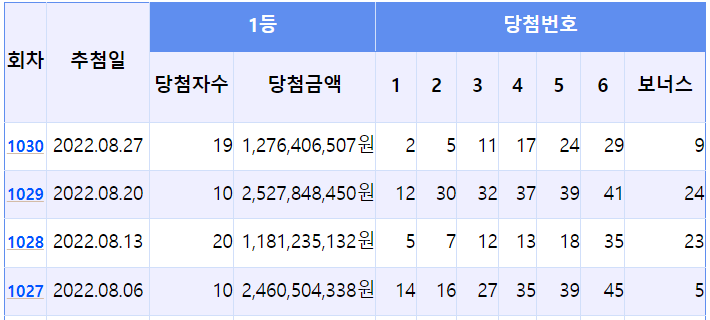

In [ ]:
# [1] 로또 정보가 있는 URL 검색 및 BeautifulSoup을 통한 파싱
import urllib.request
from bs4 import BeautifulSoup

url = 'https://signalfire85.tistory.com/28'
res = urllib.request.urlopen(url)

soup = BeautifulSoup(res, 'html.parser')
#soup   # 개발자 모드에서 확인

In [ ]:
xl69List = soup.select('td.xl69 > span')
len(xl69List)

7210

In [ ]:
# [2] 로또 번호 가져오기 (회차 번호와 함께 가져오는 방법 아님 - 그냥 번호만 쭉 가져옴)
# 중간에 빈 번호 있으면 안됨 ^^!


lotto[:3]   

[[1, 10, 23, 29, 33, 37, 40, 16],
 [2, 9, 13, 21, 25, 32, 42, 2],
 [3, 11, 16, 19, 21, 27, 31, 30]]

In [ ]:
# [3] 회차 번호와 함께 가져오는 방법을 위해 1개 행 정보를 갖는 'tr'을 검색해 봄
trList = #
len(trList)

1032

In [ ]:
# [4] 로또 번호 가져오기 (회차 + 번호)
lottoNums = []


In [ ]:
# https://music.bugs.co.kr/chart?wl_ref=M_left_02_01   
# 벅스 - 음악 순위

In [38]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://signalfire85.tistory.com/28'
res = urllib.request.urlopen(url)

soup = BeautifulSoup(res, 'html.parser')
trList = soup.select("tbody > tr > td:nth-child(1) > span > b > span > a > span")
len(trList)

85

In [37]:
lottoNums = [[] for _ in range(len(trList))] 

for i in range(len(trList)):
    for j in range(6):
        da = []   # 85 * 6
        lott = soup.select("tbody > tr:nth-child("+str(i+3)+ ") > td")
        for k in lott:
            da.append(k.string)
    lottoNums[i].append(da[4:])
    lottoNums[i].insert(0, trList[i].string)
    print(lottoNums[i])

['1030', ['2', '5', '11', '17', '24', '29', '9']]
['1029', ['12', '30', '32', '37', '39', '41', '24']]
['1028', ['5', '7', '12', '13', '18', '35', '23']]
['1027', ['14', '16', '27', '35', '39', '45', '5']]
['1026', ['5', '12', '13', '31', '32', '41', '34']]
['1025', ['8', '9', '20', '25', '29', '33', '7']]
['1024', ['9', '18', '20', '22', '38', '44', '10']]
['1023', ['10', '14', '16', '18', '29', '35', '25']]


KeyboardInterrupt: 

In [42]:
# [2] 로또 번호 가져오기 (회차 번호와 함께 가져오는 방법 아님 - 그냥 번호만 쭉 가져옴)
# 중간에 빈 번호 있으면 안됨 ^^!
import urllib.request
from bs4 import BeautifulSoup

url = 'https://signalfire85.tistory.com/28'
res = urllib.request.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
xl69List = soup.select('td.xl69 > span')
lotto = []
temp = list(map(int, [i.string for i in xl69List]))
temp2 = []
for i,v in enumerate(temp):
    if i > 0 and i % 7 == 0:
        lotto.append(temp2)
        temp2 = []
        temp2.append(v)
    else:
        temp2.append(v)
lotto.append(temp2)
lotto = lotto[::-1]
lottoNums = [ [i+1]+v for i, v in enumerate(lotto) ]
print(len(lottoNums))

1030


In [ ]:
lottoNums

In [8]:
# [4] 로또 번호 가져오기 (회차 + 번호)
lottoNums = []
tr_list = soup.select('#content > div.inner > div.entry-content > div > center > center > center > table > tbody > tr')[2:]
for idx, tr in enumerate(tr_list):
    round = len(tr_list) - idx
    datas = tr.select('td.xl69 > span')
    lottoNums.append([round] + [int(data.string) for data in datas])
len(lottoNums)

1030

In [ ]:
lottoNums

In [10]:
# [1] 로또 정보가 있는 URL 검색 및 BeautifulSoup을 통한 파싱
import urllib.request
from bs4 import BeautifulSoup

url = 'https://signalfire85.tistory.com/28'
res = urllib.request.urlopen(url)

soup = BeautifulSoup(res, 'html.parser')
#soup   # 개발자 모드에서 확인

xl69List = soup.select('td.xl69 > span')

lotto=[]
lotto2=[]
j=0

for i in xl69List:
    lotto2.append(int(i.string))
    if len(lotto2) % 7 == 0:
        lotto.append(lotto2[j*7:j*7+7])
        j+=1

time = []

for i in range(0,1031):
    time.append(i)
    
time = time[::-1]

for i in range(len(lotto)):
    lotto[i].insert(0,time[i])
    
lotto

[[1030, 2, 5, 11, 17, 24, 29, 9],
 [1029, 12, 30, 32, 37, 39, 41, 24],
 [1028, 5, 7, 12, 13, 18, 35, 23],
 [1027, 14, 16, 27, 35, 39, 45, 5],
 [1026, 5, 12, 13, 31, 32, 41, 34],
 [1025, 8, 9, 20, 25, 29, 33, 7],
 [1024, 9, 18, 20, 22, 38, 44, 10],
 [1023, 10, 14, 16, 18, 29, 35, 25],
 [1022, 5, 6, 11, 29, 42, 45, 28],
 [1021, 12, 15, 17, 24, 29, 45, 16],
 [1020, 12, 27, 29, 38, 41, 45, 6],
 [1019, 1, 4, 13, 17, 34, 39, 6],
 [1018, 3, 19, 21, 25, 37, 45, 35],
 [1017, 12, 18, 22, 23, 30, 34, 32],
 [1016, 15, 26, 28, 34, 41, 42, 44],
 [1015, 14, 23, 31, 33, 37, 40, 44],
 [1014, 3, 11, 14, 18, 26, 27, 21],
 [1013, 21, 22, 26, 34, 36, 41, 32],
 [1012, 5, 11, 18, 20, 35, 45, 3],
 [1011, 1, 9, 12, 26, 35, 38, 42],
 [1010, 9, 12, 15, 25, 34, 36, 3],
 [1009, 15, 23, 29, 34, 40, 44, 20],
 [1008, 9, 11, 30, 31, 41, 44, 33],
 [1007, 8, 11, 16, 19, 21, 25, 40],
 [1006, 8, 11, 15, 16, 17, 37, 36],
 [1005, 8, 13, 18, 24, 27, 29, 17],
 [1004, 7, 15, 30, 37, 39, 44, 18],
 [1003, 1, 4, 29, 39, 43, 45, 3